In [1]:
import numpy as np

In [4]:
N = 100
d = np.random.exponential(10, size=N)

In [5]:
d

array([ 4.36892249,  8.90385188, 12.44472072, ..., 10.79772564,
        2.83644417,  0.23369003])

## Calcolo della media di una distribuzione esponenziale

Sia
$$
p(x | \lambda) = \frac{1}{\lambda} \mathrm{e}^{-x / \lambda} \; .
$$
Calcolo
$$
\langle x \rangle = \int p(x|\lambda) x \, \mathrm{d} x
$$
$$
\int_0^\infty \frac{1}{\lambda} \mathrm{e}^{-x / \lambda} x \, \mathrm{d} x = \lambda \int_0^\infty \mathrm{e}^{-y} y \, \mathrm{d} y = \lambda
$$

$$
p(d_i|\lambda) = Z \mathrm{e}^{-d_i / \lambda}
$$

$$
p(\{ d_i \}|\lambda) = \prod_{i=1}^N p(d_i|\lambda)
$$

$$
Z = \int_1^{10} \frac{1}{\lambda} \mathrm{e}^{-x/\lambda} \, \mathrm{d}x = \int_{1/\lambda}^{10/\lambda} \mathrm{e}^{-y} \, \mathrm{d}y
$$ 

$$
Z = \left. -\mathrm{e}^{-y} \right|_{1/\lambda}^{10/\lambda} = \mathrm{e}^{-1/\lambda} - \mathrm{e}^{-10/\lambda}
$$

In [51]:
def likelihood(data, l):
    Z = np.exp(-1/l) - np.exp(-10/l)
    like = np.exp(-data / l) / l / Z
    return np.prod(like)

def log_likelihood(data, l):
    log_Z = np.log(np.exp(-1/l) - np.exp(-10/l))
    log_like = -data / l - np.log(l) - log_Z
    return np.sum(log_like)

def log_prior(l):
    if l >= 0 or l <= 100:
        return -np.log(100)
    else:
        return -np.inf
    
def log_posterior(l, data):
    return log_likelihood(data, l) + log_prior(l)

In [49]:
N = 10000
d = np.random.exponential(10, size=N)
data = d[(d > 1) & (d < 10)]
len(data)

5363

In [70]:
ls = np.linspace(0.1, 100, 1000)

In [74]:
log_posts = np.zeros_like(ls)
for n in range(len(ls)):
    log_posts[n] = log_posterior(ls[n], data)

In [88]:
from scipy.special import logsumexp

log_posts -= logsumexp(log_posts)

In [90]:
np.sum(np.exp(log_posts))

1.0000000000001334

(5.0, 15.0)

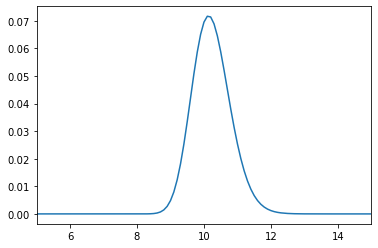

In [107]:
from matplotlib import pyplot as plt

plt.plot(ls, np.exp(log_posts))
plt.xlim(5, 15)

In [108]:
posts = np.exp(log_posts)

In [115]:
np.sum(posts[(ls > 8) & (ls < 11.5)])

0.9771547273693507

In [116]:
np.sum(posts[ls>12])

0.002479095595868104